#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.
 
### CHAPTER 12
**CH12 Returns on a company stock and market returns**

version 1.0 2021-05-31
 
 

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import warnings

import statsmodels.api as sm
import statsmodels.formula.api as smf
from mizani.breaks import date_breaks
from mizani.formatters import date_format
from plotnine import *
from datetime import datetime
from arch.unitroot import PhillipsPerron
import warnings
from stargazer.stargazer import Stargazer

warnings.filterwarnings("ignore")

In [4]:
current_path = os.getcwd()
base_dir = current_path.split("da_case_studies")[0]
data_in = os.path.join(str(base_dir), "da_data_repo/stocks-sp500/raw/")
data_out = os.path.join(str(base_dir), "da_data_repo/stocks-sp500/clean/")
output = os.path.join(str(base_dir), "da_case_studies/ch12-stock-returns-risk/output/")
func = os.path.join(str(base_dir), "da_case_studies/ch00-tech-prep/")
sys.path.append(func)

In [5]:
from py_helper_functions import *

In [6]:
stock_data = pd.read_csv(os.path.join(data_in,"ready_sp500_45_cos.csv"))

In [7]:
stock_data.head()

,ticker,ref.date,price.open,price.close,price.adjusted,price.low,price.high,volume
0,ACN,2001-07-19,15.10,15.17,11.497672,15.00,15.29,34994300.0
1,ACN,2001-07-20,15.05,15.01,11.376402,14.80,15.05,9238500.0
2,ACN,2001-07-23,15.00,15.00,11.368821,14.55,15.01,7501000.0
3,ACN,2001-07-24,14.95,14.86,11.262713,14.70,14.97,3537300.0
4,ACN,2001-07-25,14.70,14.95,11.330926,14.65,14.95,4208100.0


In [8]:
MSFT = stock_data[stock_data['ticker']=='MSFT']

In [9]:
p_MSFT = MSFT[['ref.date','price.close']]. \
rename(columns={'ref.date':'date'}). \
reset_index(drop=True)

In [10]:
p_MSFT['date']=pd.to_datetime(p_MSFT['date'])

In [11]:
p_MSFT.head()

,date,price.close
0,1997-12-29,15.789063
1,1997-12-30,16.281250
2,1997-12-31,16.156250
3,1998-01-02,16.390625
4,1998-01-05,16.296875


In [12]:
sp500_index = pd.read_csv(os.path.join(data_in,"ready_sp500_index.csv"))

In [13]:
p_SP500 = sp500_index[['ref.date','price.close']]. \
rename(columns={'ref.date':'date'}). \
reset_index(drop=True)

In [14]:
p_SP500['date']=pd.to_datetime(p_SP500['date'])

In [15]:
data_daily=pd.merge(p_SP500,p_MSFT,how='inner',on='date').\
rename(columns={'price.close_x':'p_SP500','price.close_y':'p_MSFT'})

In [16]:
data_daily = data_daily[(data_daily['date']>='1997-12-31') & \
           (data_daily['date']<='2018-12-31')] 

In [17]:
data_daily['year'] = data_daily['date'].dt.year

In [18]:
data_daily['month'] = data_daily['date'].dt.month

In [19]:
#data_daily.to_csv(os.path.join(data_out,"stock-prices-daily.csv"))

In [20]:
# PART I: Graphs

In [21]:
data_daily['lnp_MSFT']=data_daily['p_MSFT'].map(lambda x:np.log(x))

In [22]:
data_daily['lnp_SP500']=data_daily['p_SP500'].map(lambda x:np.log(x))

In [23]:
limits = datetime(1998, 1, 1), datetime(2018, 1, 1)

In [24]:
breaks = date_breaks('2 year')

### Figure 12.2 Stock prices, daily time series

(a) Microsoft

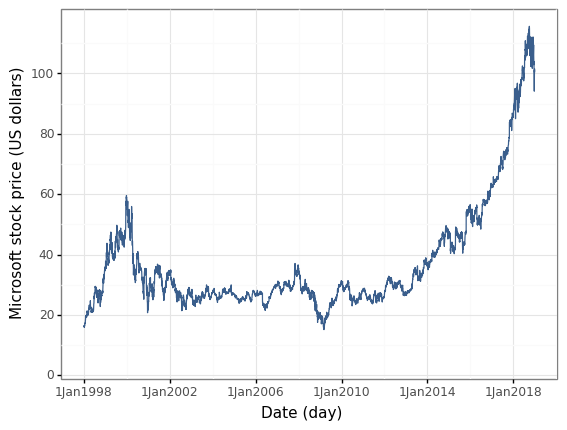

<ggplot: (317586131)>

In [25]:
(
    ggplot(data_daily)
    + geom_line(aes("date", "p_MSFT"), color=color[0], size=0.5)
    + scale_y_continuous(expand=[0.01, 0.01], limits=[0, 120], breaks=seq(0, 120, 20))
    + scale_x_date(breaks=breaks(limits)[::2], labels=date_format("1%b%Y"))
    + labs(y="Microsoft stock price (US dollars)", x="Date (day)")
    + theme_bw()
)

(b) S&P500 index

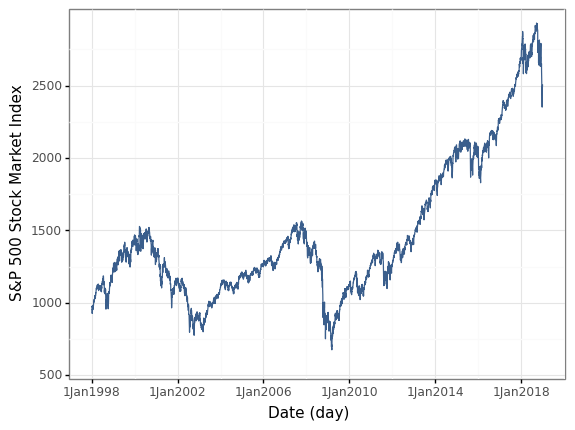

<ggplot: (317707072)>

In [26]:
(
    ggplot(data_daily)
    + geom_line(aes("date", "p_SP500"), color=color[0], size=0.5)
    + scale_y_continuous(
        expand=[0.01, 0.01], limits=[500, 3000], breaks=seq(500, 3000, 500)
    )
    + scale_x_date(breaks=breaks(limits)[::2], labels=date_format("1%b%Y"))
    + labs(y="S&P 500 Stock Market Index", x="Date (day)")
    + theme_bw()
)

In [27]:
print(PhillipsPerron(data_daily['p_MSFT'],lags=32,test_type='rho',trend='n'))
print(PhillipsPerron(data_daily['p_MSFT'],lags=32,test_type='rho',trend='c'))
print(PhillipsPerron(data_daily['p_MSFT'],lags=32,test_type='rho',trend='ct'))

     Phillips-Perron Test (Z-rho)    
Test Statistic                  2.287
P-value                         0.994
Lags                               32
-------------------------------------

Trend: No Trend
Critical Values: -13.24 (1%), -7.79 (5%), -5.54 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                  2.245
P-value                         0.998
Lags                               32
-------------------------------------

Trend: Constant
Critical Values: -20.60 (1%), -14.08 (5%), -11.24 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -0.092
P-value                         0.995
Lags                               32
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.31 (1%),

In [28]:
print(PhillipsPerron(data_daily['p_SP500'],lags=32,test_type='rho',trend='n'))
print(PhillipsPerron(data_daily['p_SP500'],lags=32,test_type='rho',trend='c'))
print(PhillipsPerron(data_daily['p_SP500'],lags=32,test_type='rho',trend='ct'))

     Phillips-Perron Test (Z-rho)    
Test Statistic                  0.908
P-value                         0.892
Lags                               32
-------------------------------------

Trend: No Trend
Critical Values: -13.24 (1%), -7.79 (5%), -5.54 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -0.292
P-value                         0.940
Lags                               32
-------------------------------------

Trend: Constant
Critical Values: -20.60 (1%), -14.08 (5%), -11.24 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -3.943
P-value                         0.894
Lags                               32
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.31 (1%),

In [29]:
data_daily['l.p_MSFT'] = data_daily['p_MSFT'].shift()
data_daily['l.p_SP500'] = data_daily['p_SP500'].shift()
data_daily['d.p_MSFT'] = data_daily['p_MSFT'] - data_daily['l.p_MSFT']
data_daily['d.p_SP500'] = data_daily['p_SP500'] - data_daily['l.p_SP500']
data_daily['PctRetMSFT'] = data_daily['d.p_MSFT']/data_daily['l.p_MSFT']*100
data_daily['PctRetSP500'] = data_daily['d.p_SP500']/data_daily['l.p_SP500']*100

In [30]:
data_daily['d.lnp_MSFT'] = np.log(data_daily['p_MSFT']) - np.log(data_daily['p_MSFT'].shift())
data_daily['d.lnp_SP500'] = np.log(data_daily['p_SP500']) - np.log(data_daily['p_SP500'].shift())

In [31]:
data_monthly = data_daily[['date','year','month','p_SP500','p_MSFT']].\
groupby(data_daily['date'].dt.to_period('M')).last().reset_index(drop=True)

In [32]:
data_monthly

,date,year,month,p_SP500,p_MSFT
0,1997-12-31,1997,12,970.429993,16.156250
1,1998-01-30,1998,1,980.280029,18.648438
2,1998-02-27,1998,2,1049.339966,21.187500
3,1998-03-31,1998,3,1101.750000,22.375000
4,1998-04-30,1998,4,1111.750000,22.531250
...,...,...,...,...,...
248,2018-08-31,2018,8,2901.520020,112.330002
249,2018-09-28,2018,9,2913.979980,114.370003
250,2018-10-31,2018,10,2711.739990,106.809998
251,2018-11-30,2018,11,2760.169922,110.889999


In [33]:
data_monthly['l.p_MSFT'] = data_monthly['p_MSFT'].shift()
data_monthly['l.p_SP500'] = data_monthly['p_SP500'].shift()
data_monthly['d.p_MSFT'] = data_monthly['p_MSFT'] - data_monthly['l.p_MSFT']
data_monthly['d.p_SP500'] = data_monthly['p_SP500'] - data_monthly['l.p_SP500']
data_monthly['PctRetMSFT'] = data_monthly['d.p_MSFT']/data_monthly['l.p_MSFT']*100
data_monthly['PctRetSP500'] = data_monthly['d.p_SP500']/data_monthly['l.p_SP500']*100

In [34]:
data_monthly['d.lnp_MSFT'] = np.log(data_monthly['p_MSFT']) - np.log(data_monthly['p_MSFT'].shift())
data_monthly['d.lnp_SP500'] = np.log(data_monthly['p_SP500']) - np.log(data_monthly['p_SP500'].shift())

In [35]:
data_daily.head()

,date,p_SP500,p_MSFT,year,month,lnp_MSFT,lnp_SP500,l.p_MSFT,l.p_SP500,d.p_MSFT,d.p_SP500,PctRetMSFT,PctRetSP500,d.lnp_MSFT,d.lnp_SP500
2,1997-12-31,970.429993,16.156250,1997,12,2.782307,6.877739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1998-01-02,975.039978,16.390625,1998,1,2.796710,6.882478,16.156250,970.429993,0.234375,4.609985,1.450677,0.475046,0.014403,0.004739
4,1998-01-05,977.070007,16.296875,1998,1,2.790973,6.884558,16.390625,975.039978,-0.093750,2.030029,-0.571973,0.208200,-0.005736,0.002080
5,1998-01-06,966.580017,16.390625,1998,1,2.796710,6.873764,16.296875,977.070007,0.093750,-10.489990,0.575264,-1.073617,0.005736,-0.010794
6,1998-01-07,964.000000,16.195313,1998,1,2.784722,6.871091,16.390625,966.580017,-0.195312,-2.580017,-1.191608,-0.266922,-0.011988,-0.002673


In [36]:
data_monthly.head()

,date,year,month,p_SP500,p_MSFT,l.p_MSFT,l.p_SP500,d.p_MSFT,d.p_SP500,PctRetMSFT,PctRetSP500,d.lnp_MSFT,d.lnp_SP500
0,1997-12-31,1997,12,970.429993,16.156250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-01-30,1998,1,980.280029,18.648438,16.156250,970.429993,2.492188,9.850036,15.425535,1.015018,0.143455,0.010099
2,1998-02-27,1998,2,1049.339966,21.187500,18.648438,980.280029,2.539062,69.059937,13.615414,7.044919,0.127649,0.068078
3,1998-03-31,1998,3,1101.750000,22.375000,21.187500,1049.339966,1.187500,52.410034,5.604720,4.994571,0.054533,0.048738
4,1998-04-30,1998,4,1111.750000,22.531250,22.375000,1101.750000,0.156250,10.000000,0.698324,0.907647,0.006959,0.009036


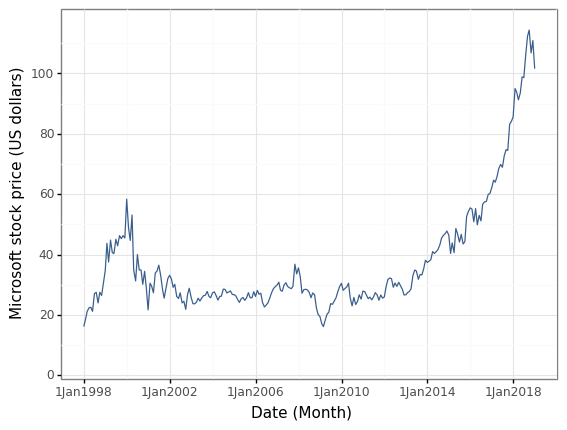

<ggplot: (317635350)>

In [37]:
(
    ggplot(data_monthly)
    + geom_line(aes("date", "p_MSFT"), color=color[0], size=0.5)
    + scale_y_continuous(expand=[0.01, 0.01], limits=[0, 120], breaks=seq(0, 120, 20))
    + scale_x_date(breaks=breaks(limits)[::2], labels=date_format("1%b%Y"))
    + labs(y="Microsoft stock price (US dollars)", x="Date (Month)")
    + theme_bw()
)

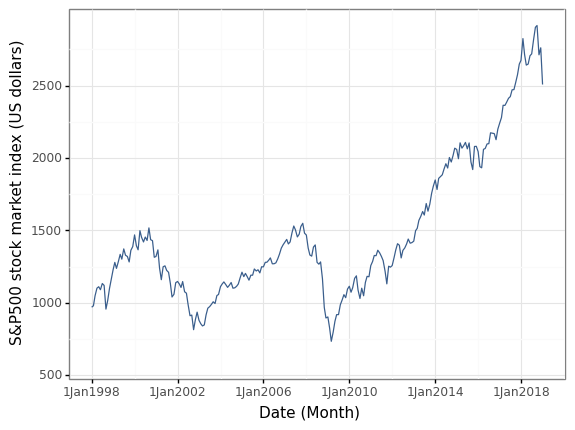

<ggplot: (317732557)>

In [38]:
(
    ggplot(data_monthly)
    + geom_line(aes("date", "p_SP500"), color=color[0], size=0.5)
    + scale_y_continuous(
        expand=[0.01, 0.01], limits=[500, 3000], breaks=seq(500, 3000, 500)
    )
    + scale_x_date(breaks=breaks(limits)[::2], labels=date_format("1%b%Y"))
    + labs(y="S&P500 stock market index (US dollars)", x="Date (Month)")
    + theme_bw()
)

In [39]:
print(PhillipsPerron(data_daily['p_MSFT'],lags=32,test_type='rho',trend='n'))
print(PhillipsPerron(data_daily['p_MSFT'],lags=32,test_type='rho',trend='c'))
print(PhillipsPerron(data_daily['p_MSFT'],lags=32,test_type='rho',trend='ct'))

     Phillips-Perron Test (Z-rho)    
Test Statistic                  2.287
P-value                         0.994
Lags                               32
-------------------------------------

Trend: No Trend
Critical Values: -13.24 (1%), -7.79 (5%), -5.54 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                  2.245
P-value                         0.998
Lags                               32
-------------------------------------

Trend: Constant
Critical Values: -20.60 (1%), -14.08 (5%), -11.24 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -0.092
P-value                         0.995
Lags                               32
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.31 (1%),

In [40]:
print(PhillipsPerron(data_daily['p_SP500'],lags=32,test_type='rho',trend='n'))
print(PhillipsPerron(data_daily['p_SP500'],lags=32,test_type='rho',trend='c'))
print(PhillipsPerron(data_daily['p_SP500'],lags=32,test_type='rho',trend='ct'))

     Phillips-Perron Test (Z-rho)    
Test Statistic                  0.908
P-value                         0.892
Lags                               32
-------------------------------------

Trend: No Trend
Critical Values: -13.24 (1%), -7.79 (5%), -5.54 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -0.292
P-value                         0.940
Lags                               32
-------------------------------------

Trend: Constant
Critical Values: -20.60 (1%), -14.08 (5%), -11.24 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -3.943
P-value                         0.894
Lags                               32
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.31 (1%),

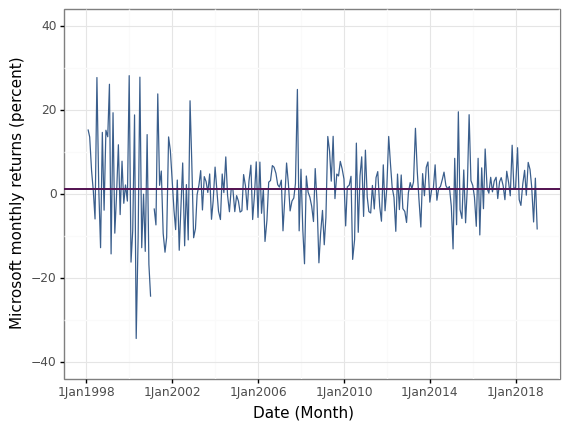

<ggplot: (317775541)>

In [41]:
(
    ggplot(data_monthly)
    + geom_line(aes("date", "PctRetMSFT"), color=color[0], size=0.5)
    + scale_x_date(breaks=breaks(limits)[::2], labels=date_format("1%b%Y"))
    + geom_hline(yintercept=1.13, color=color[2], size=0.8)
    + labs(y="Microsoft monthly returns (percent)", x="Date (Month)")
    + ylim(-40, 40)
    + theme_bw()
)

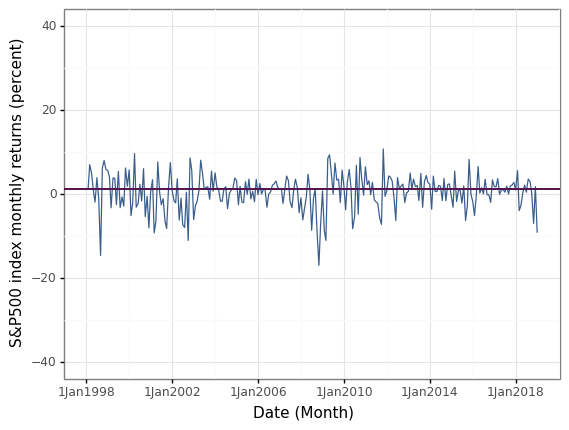

<ggplot: (317723281)>

In [42]:
(
    ggplot(data_monthly)
    + geom_line(aes("date", "PctRetSP500"), color=color[0], size=0.5)
    + scale_x_date(breaks=breaks(limits)[::2], labels=date_format("1%b%Y"))
    + geom_hline(yintercept=1.13, color=color[2], size=0.8)
    + labs(y="S&P500 index monthly returns (percent)", x="Date (Month)")
    + ylim(-40, 40)
    + theme_bw()
)

In [43]:
data_monthly.head(2)

,date,year,month,p_SP500,p_MSFT,l.p_MSFT,l.p_SP500,d.p_MSFT,d.p_SP500,PctRetMSFT,PctRetSP500,d.lnp_MSFT,d.lnp_SP500
0,1997-12-31,1997,12,970.429993,16.156250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-01-30,1998,1,980.280029,18.648438,16.15625,970.429993,2.492188,9.850036,15.425535,1.015018,0.143455,0.010099


In [44]:
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetMSFT"], lags=5, test_type="rho", trend="n"
    )
)
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetMSFT"], lags=5, test_type="rho", trend="c"
    )
)
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetMSFT"], lags=5, test_type="rho", trend="ct"
    )
)

     Phillips-Perron Test (Z-rho)    
Test Statistic               -285.235
P-value                         0.000
Lags                                5
-------------------------------------

Trend: No Trend
Critical Values: -12.12 (1%), -7.03 (5%), -4.96 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic               -280.444
P-value                         0.000
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -20.16 (1%), -13.86 (5%), -11.10 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic               -280.268
P-value                         0.000
Lags                                5
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -28.45 (1%),

In [45]:
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetSP500"], lags=5, test_type="rho", trend="n"
    )
)
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetSP500"], lags=5, test_type="rho", trend="c"
    )
)
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetSP500"], lags=5, test_type="rho", trend="ct"
    )
)

     Phillips-Perron Test (Z-rho)    
Test Statistic               -234.376
P-value                         0.000
Lags                                5
-------------------------------------

Trend: No Trend
Critical Values: -12.12 (1%), -7.03 (5%), -4.96 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic               -233.937
P-value                         0.000
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -20.16 (1%), -13.86 (5%), -11.10 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic               -233.518
P-value                         0.000
Lags                                5
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -28.45 (1%),

### Table 12.1 Descriptive statistics on monthly returns

In [48]:
results = (
    data_monthly[["PctRetMSFT", "PctRetSP500"]]
    .describe()
    .T[["min", "max", "mean", "std", "count"]]
    .rename(columns={"std": "sd", "count": "N"})
)
results.index = ["Monthly returns on Microsoft (%)", "Monthly returns on S&P500 (%)"]
results.round(1)

,min,max,mean,sd,N
Monthly returns on Microsoft (%),-34.4,40.8,1.1,9.1,252.0
Monthly returns on S&P500 (%),-16.9,10.8,0.5,4.3,252.0


In [49]:
reg1 = smf.ols("PctRetMSFT ~ PctRetSP500", data=data_monthly).fit()
reg2 = smf.ols(
    "d_lnp_MSFT ~ d_lnp_SP500",
    data=data_monthly.rename(
        columns={"d.lnp_MSFT": "d_lnp_MSFT", "d.lnp_SP500": "d_lnp_SP500"}
    ),
).fit()
reg3 = smf.ols("PctRetMSFT ~ PctRetSP500", data=data_daily).fit()
reg4 = smf.ols(
    "d_lnp_MSFT ~ d_lnp_SP500",
    data=data_daily.rename(
        columns={"d.lnp_MSFT": "d_lnp_MSFT", "d.lnp_SP500": "d_lnp_SP500"}
    ),
).fit()

In [50]:
print(reg1.get_robustcov_results(cov_type='HC1').summary())

                            OLS Regression Results                            
Dep. Variable:             PctRetMSFT   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     150.5
Date:                Mon, 31 May 2021   Prob (F-statistic):           2.14e-27
Time:                        14:51:39   Log-Likelihood:                -857.14
No. Observations:                 252   AIC:                             1718.
Df Residuals:                     250   BIC:                             1725.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.5396      0.453      1.191      

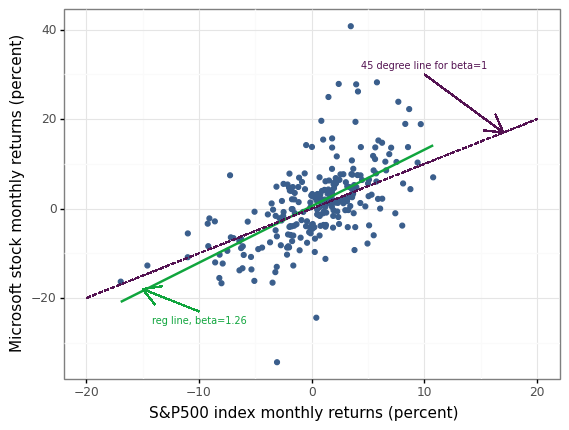

<ggplot: (319622518)>

In [100]:
(
    ggplot(data_monthly, aes("PctRetSP500", "PctRetMSFT"))
    + geom_point(color=color[0])
    + geom_smooth(method="lm", se=False, color=color[1])
    + labs(
        x="S&P500 index monthly returns (percent)",
        y="Microsoft stock monthly returns (percent)",
    )
    + theme_bw()
    + geom_segment(
        aes(x=-20, y=-20, xend=20, yend=20), color=color[2], size=0.5, linetype="dashed"
    )
    + geom_segment(aes(x=10, y=30, xend=17, yend=17), color=color[2], arrow=arrow())
    + annotate(
        "text", x=10, y=32, size=7, label="45 degree line for beta=1", color=color[2]
    )
    + geom_segment(aes(x=-10, y=-23, xend=-15, yend=-18), color=color[1], arrow=arrow())
    + annotate(
        "text", x=-10, y=-25, size=7, color=color[1], label="reg line, beta=1.26"
    )
)

In [53]:
data_monthly_tidy = pd.melt(
    data_monthly[["date", "PctRetMSFT", "PctRetSP500"]],
    id_vars=["date"],
    var_name="index",
    value_name="pct_return",
)

In [54]:
data_monthly_tidy_17_18 = data_monthly_tidy.loc[data_monthly_tidy['date'] > '2017-01-01']

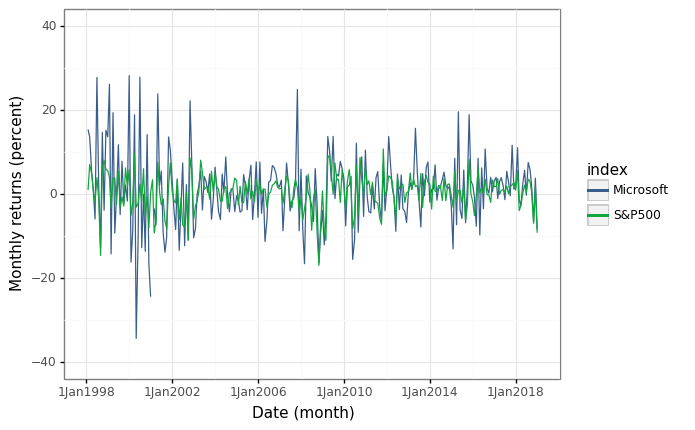

<ggplot: (318143067)>

In [55]:
(ggplot(data_monthly_tidy)
 + geom_line(aes(x='date',y = 'pct_return',color='index'),size = 0.5)
 + scale_color_manual(name = "", values=[color[0], color[1], color[3]], labels = ["Microsoft", "S&P500"]) 
 + labs(x = 'Date (month)',y = "Monthly returns (percent)")
 + scale_y_continuous(expand = [0.01,0.01], breaks = seq(-12,12,4)) 
 + scale_x_date(breaks = breaks(limits)[::2], labels = date_format("1%b%Y"))
 + ylim(-40,40) 
 + theme_bw()
)

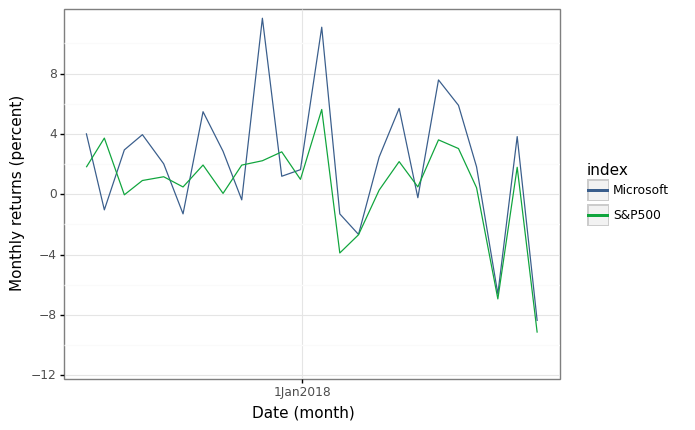

<ggplot: (318153159)>

In [56]:
(ggplot(data_monthly_tidy_17_18)
 + geom_line(aes(x='date',y = 'pct_return',color='index'),size = 0.5)
 + scale_color_manual(name = "", values=[color[0], color[1], color[3]], labels = ["Microsoft", "S&P500"]) 
 + labs(x = 'Date (month)',y = "Monthly returns (percent)")
 + scale_y_continuous(expand = [0.01,0.01], limits = [-12,12], breaks = seq(-12,12,4)) 
 + scale_x_date(breaks = breaks(limits)[::2], labels = date_format("1%b%Y"))
 + theme_bw()
)

In [57]:
#Regressions

In [59]:
print(reg2.get_robustcov_results(cov_type='HC1').summary())

                            OLS Regression Results                            
Dep. Variable:             d_lnp_MSFT   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     152.9
Date:                Mon, 31 May 2021   Prob (F-statistic):           1.01e-27
Time:                        14:53:50   Log-Likelihood:                 307.80
No. Observations:                 252   AIC:                            -611.6
Df Residuals:                     250   BIC:                            -604.5
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0026      0.005      0.581      

In [60]:
print(reg3.get_robustcov_results(cov_type='HC1').summary())

                            OLS Regression Results                            
Dep. Variable:             PctRetMSFT   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     2046.
Date:                Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                        14:54:26   Log-Likelihood:                -9529.9
No. Observations:                5283   AIC:                         1.906e+04
Df Residuals:                    5281   BIC:                         1.908e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0266      0.020      1.319      

In [61]:
print(reg4.get_robustcov_results(cov_type='HC1').summary())

                            OLS Regression Results                            
Dep. Variable:             d_lnp_MSFT   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     2156.
Date:                Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                        14:54:26   Log-Likelihood:                 14790.
No. Observations:                5283   AIC:                        -2.958e+04
Df Residuals:                    5281   BIC:                        -2.956e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0002      0.000      0.747      

In [62]:
reg1 = smf.ols('PctRetMSFT ~ PctRetSP500', data=data_monthly).fit()
reg2 = smf.ols('d_lnp_MSFT ~ d_lnp_SP500',
               data=data_monthly.rename(columns={'d.lnp_MSFT':'d_lnp_MSFT','d.lnp_SP500':'d_lnp_SP500'})
              ).fit()
reg3 = smf.ols('PctRetMSFT ~ PctRetSP500', data=data_daily).fit()
reg4 = smf.ols('d_lnp_MSFT ~ d_lnp_SP500',
               data=data_daily.rename(columns={'d.lnp_MSFT':'d_lnp_MSFT','d.lnp_SP500':'d_lnp_SP500'})
              ).fit()

### Table 12.3 Returns on Microsoft and market returns: alternative measurements

In [71]:
stargazer = Stargazer([reg1, reg2, reg3, reg4])
stargazer.covariate_order(["PctRetSP500", "d_lnp_SP500", "Intercept"])
stargazer.rename_covariates(
    {
        "Intercept": "Constant",
        "PctRetSP500": "S&P500 returns",
        "d_lnp_SP500": "S&P500 returns",
    }
)
stargazer.custom_columns(
    [
        "Monthly pct change",
        "Monthly log change",
        "Daily pct change",
        "Daily log change",
    ],
    [1, 1, 1, 1],
)
stargazer